# TEST PROJEKT1


## Dane i importy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [ ]:
!wget https://lovespreadsheet-tutorials.s3.amazonaws.com/APIDatasets/census_income_dataset.csv
df_raw = pd.read_csv('census_income_dataset.csv')
df_build = df_raw.sample(frac=0.7, random_state=500)
df_validation = df_raw.drop(df_build.index) 
df = df_build.sample(frac=0.7, random_state=500)
df_test = df_build.drop(df.index) 

--2022-04-21 18:59:56--  https://lovespreadsheet-tutorials.s3.amazonaws.com/APIDatasets/census_income_dataset.csv
Resolving lovespreadsheet-tutorials.s3.amazonaws.com (lovespreadsheet-tutorials.s3.amazonaws.com)... 52.217.72.180
Connecting to lovespreadsheet-tutorials.s3.amazonaws.com (lovespreadsheet-tutorials.s3.amazonaws.com)|52.217.72.180|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5717107 (5.5M) [text/csv]
Saving to: ‘census_income_dataset.csv’

census_income_datas 100%[===================>]   5.45M  22.4MB/s    in 0.2s    

2022-04-21 18:59:57 (22.4 MB/s) - ‘census_income_dataset.csv’ saved [5717107/5717107]



Teraz mamy df do trainu i df_test do testowania

## WOE niewaznhy brudnopis nastepny rozdzial wazny

In [ ]:
df.nunique()

NameError: ignored

In [ ]:
X_train = df.copy()

In [ ]:
y_train = X_train['income_level']

In [ ]:
y_train

20969    <=50K
14393    <=50K
2480     <=50K
10614    <=50K
31047    <=50K
         ...  
45031    <=50K
24143    <=50K
23994     >50K
1398     <=50K
12337     >50K
Name: income_level, Length: 23932, dtype: object

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23932 entries, 20969 to 12337
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             23932 non-null  int64  
 1   workclass       23932 non-null  object 
 2   fnlwgt          23932 non-null  float64
 3   education       23932 non-null  object 
 4   education_num   23932 non-null  int64  
 5   marital_status  23932 non-null  object 
 6   occupation      23932 non-null  object 
 7   relationship    23932 non-null  object 
 8   race            23932 non-null  object 
 9   sex             23932 non-null  object 
 10  capital_gain    23932 non-null  float64
 11  capital_loss    23932 non-null  float64
 12  hours_per_week  23932 non-null  float64
 13  native_country  23932 non-null  object 
 14  income_level    23932 non-null  object 
dtypes: float64(4), int64(2), object(9)
memory usage: 2.9+ MB


In [ ]:
! pip install category_encoders

     |████████████████████████████████| 86 kB 2.8 MB/s 


In [ ]:
import category_encoders as ce

TUTEJ WOE

In [ ]:
woeEncoder = ce.WOEEncoder()

In [ ]:
del X_train['income_level']

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23932 entries, 20969 to 12337
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             23932 non-null  int64  
 1   workclass       23932 non-null  object 
 2   fnlwgt          23932 non-null  float64
 3   education       23932 non-null  object 
 4   education_num   23932 non-null  int64  
 5   marital_status  23932 non-null  object 
 6   occupation      23932 non-null  object 
 7   relationship    23932 non-null  object 
 8   race            23932 non-null  object 
 9   sex             23932 non-null  object 
 10  capital_gain    23932 non-null  float64
 11  capital_loss    23932 non-null  float64
 12  hours_per_week  23932 non-null  float64
 13  native_country  23932 non-null  object 
dtypes: float64(4), int64(2), object(8)
memory usage: 2.7+ MB


In [ ]:
pd.crosstab(X_train['sex'], y_train)

income_level,<=50K,>50K
sex,,
Female,7086,862
Male,11169,4815


In [ ]:
pd.crosstab(X_train['marital_status'], y_train)[1].sum() # TO SIĘ NIE KOMPILUJE JAK COŚ DANIEL

KeyError: ignored

In [ ]:
pd.crosstab(X_train['marital_status'], y_train)

In [ ]:
X_train.nunique()

In [ ]:
X_train

## Preprocessing

In [ ]:
woeEncoder = ce.WOEEncoder()

In [ ]:
X_train = df.copy()

In [ ]:
y_train = X_train['income_level']

In [ ]:
y_train = y_train.apply(lambda x: 1 if x=='>50K' else 0)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23932 entries, 20969 to 12337
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             23932 non-null  int64  
 1   workclass       23932 non-null  object 
 2   fnlwgt          23932 non-null  float64
 3   education       23932 non-null  object 
 4   education_num   23932 non-null  int64  
 5   marital_status  23932 non-null  object 
 6   occupation      23932 non-null  object 
 7   relationship    23932 non-null  object 
 8   race            23932 non-null  object 
 9   sex             23932 non-null  object 
 10  capital_gain    23932 non-null  float64
 11  capital_loss    23932 non-null  float64
 12  hours_per_week  23932 non-null  float64
 13  native_country  23932 non-null  object 
 14  income_level    23932 non-null  object 
dtypes: float64(4), int64(2), object(9)
memory usage: 2.9+ MB


In [ ]:
X_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
20969,34,Private,36385.0,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Male,0.0,2258.0,50.0,United-States,<=50K
14393,23,Private,150463.0,HS-grad,9,Never-married,Priv-house-serv,Unmarried,Other,Female,0.0,0.0,40.0,Guatemala,<=50K
2480,41,Private,195897.0,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
10614,39,Local-gov,189911.0,11th,7,Divorced,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
31047,45,Private,191098.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0.0,0.0,40.0,China,<=50K


In [ ]:
X_train['age'],bins = pd.qcut(X_train['age'], q = 10, labels=False, retbins=True)
X_train = X_train.astype({"age": str})
del X_train['education_num']
del X_train['fnlwgt']
X_train['capital_gain']=X_train['capital_gain'].apply(lambda x: "1" if x>0 else "2" )
X_train['capital_loss']=X_train['capital_loss'].apply(lambda x: "1" if x>0 else "2")
X_train['hours_per_week']=X_train['hours_per_week'].apply(lambda x: "1" if x>40 else "2")
del X_train['income_level']

In [ ]:
X_test = df_test.copy()

In [ ]:
y_test = X_test['income_level']

In [ ]:
y_test = y_test.apply(lambda x: 1 if x=='>50K' else 0)

In [ ]:
bins

array([17., 22., 26., 30., 33., 37., 41., 46., 51., 58., 90.])

In [ ]:
X_test['age'] = pd.cut(X_test['age'], bins=[0., 22., 26., 30., 33., 37., 41., 46., 51., 58., 100.], labels=False,)
X_test = X_test.astype({"age": str})
del X_test['education_num']
del X_test['fnlwgt']
X_test['capital_gain']=X_test['capital_gain'].apply(lambda x: "1" if x>0 else "2" )
X_test['capital_loss']=X_test['capital_loss'].apply(lambda x: "1" if x>0 else "2")
X_test['hours_per_week']=X_test['hours_per_week'].apply(lambda x: "1" if x>40 else "2")
del X_test['income_level']

In [ ]:
X_ez = woeEncoder.fit_transform(X_train, y_train)

ZLaczenie bliskich WOE i znowu WOE

In [ ]:
for col in X_ez.columns:
  X_ez[col] = round(X_ez[col],1)
  X_ez = X_ez.astype({col: str})

In [ ]:
woeEncoder = ce.WOEEncoder()
X_ez = woeEncoder.fit_transform(X_ez, y_train)

Zakodowanie przy pomocy dictionaries

In [ ]:
for col in X_test.columns:
  X_test[col] = X_test[col].map(dict(zip(X_train[col],X_ez[col])))


In [ ]:
X_train.nunique()

age                5
workclass          9
education         16
marital_status     7
occupation        15
relationship       6
race               5
sex                2
capital_gain       2
capital_loss       2
hours_per_week     2
native_country    42
dtype: int64

In [ ]:
X_train.nunique()

age                5
workclass          9
education         16
marital_status     7
occupation        15
relationship       6
race               5
sex                2
capital_gain       2
capital_loss       2
hours_per_week     2
native_country    42
dtype: int64

In [ ]:
X_train.head()

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
20969,2,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Male,2,1,1,United-States
14393,0,Private,HS-grad,Never-married,Priv-house-serv,Unmarried,Other,Female,2,2,2,Guatemala
2480,2,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,2,2,1,United-States
10614,2,Local-gov,11th,Divorced,Adm-clerical,Unmarried,White,Female,2,2,2,United-States
31047,3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,2,2,2,China


In [ ]:
X_ez.head()

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
20969,0.193943,-0.128814,1.338300,-1.835591,0.940308,-0.999529,0.078721,0.326486,-0.199789,1.142456,0.736684,0.020554
14393,-1.942820,-0.128814,-0.492290,-1.835591,-2.569896,-1.668796,-0.975090,-0.937829,-0.199789,-0.069931,-0.403993,-1.852651
2480,0.518111,-0.128814,-0.326788,0.938622,0.141762,0.959616,0.078721,0.326486,-0.199789,-0.069931,0.736684,0.020554
10614,0.518111,0.246506,-1.779055,-1.044336,-0.675639,-1.668796,0.078721,-0.937829,-0.199789,-0.069931,-0.403993,0.020554
31047,0.672863,-0.128814,0.790213,0.938622,0.940308,0.959616,0.152543,0.326486,-0.199789,-0.069931,-0.403993,0.543619


In [ ]:
X_test.head()

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
33032,-0.556018,0.143746,1.338300,-1.044336,0.940308,-0.999529,0.078721,0.326486,-0.199789,-0.069931,-0.403993,0.044770
8650,0.193943,0.246506,0.095021,-1.835591,0.940308,-0.999529,0.078721,-0.937829,-0.199789,-0.069931,-0.403993,0.020554
14474,-0.160709,-0.128814,0.095021,0.938622,0.940308,0.959616,0.078721,-0.937829,-0.199789,-0.069931,-0.403993,0.020554
28363,0.616156,1.386080,-0.326788,0.938622,0.141762,0.959616,0.078721,0.326486,-0.199789,-0.069931,0.736684,0.020554
34599,0.753663,-0.128814,-0.492290,-1.397176,1.083736,-0.999529,0.078721,0.326486,1.651643,-0.069931,0.736684,0.020554


## Modelowanie

Zaimportujmy niezbędne biblioteki.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
X_ez

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
20969,0.356148,-0.128814,1.338300,-1.835591,0.940308,-0.999529,0.078721,0.326486,-0.199789,1.142456,0.736684,0.020554
14393,-2.649743,-0.128814,-0.492290,-1.835591,-2.569896,-1.668796,-0.975090,-0.937829,-0.199789,-0.069931,-0.403993,-1.852651
2480,0.356148,-0.128814,-0.326788,0.938622,0.141762,0.959616,0.078721,0.326486,-0.199789,-0.069931,0.736684,0.020554
10614,0.356148,0.246506,-1.779055,-1.044336,-0.675639,-1.668796,0.078721,-0.937829,-0.199789,-0.069931,-0.403993,0.020554
31047,0.709235,-0.128814,0.790213,0.938622,0.940308,0.959616,0.152543,0.326486,-0.199789,-0.069931,-0.403993,0.543619
...,...,...,...,...,...,...,...,...,...,...,...,...
45031,-0.373307,0.246506,-0.492290,0.938622,0.410286,0.959616,0.078721,0.326486,-0.199789,-0.069931,0.736684,0.020554
24143,0.356148,-0.128814,-0.492290,-1.835591,1.083736,-0.999529,-0.803166,0.326486,1.651643,-0.069931,0.736684,0.020554
23994,0.709235,-0.128814,-1.638772,0.938622,-0.777338,0.959616,-0.803166,0.326486,-0.199789,1.142456,-0.403993,0.020554
1398,0.709235,-0.128814,-1.638772,0.938622,-1.426652,0.959616,0.078721,0.326486,1.651643,-0.069931,0.736684,0.020554


In [ ]:
y_train

20969    0
14393    0
2480     0
10614    0
31047    0
        ..
45031    0
24143    0
23994    1
1398     0
12337    1
Name: income_level, Length: 23932, dtype: int64

### LogisticRegression

In [ ]:
lr_base = LogisticRegression(random_state=42)
lr_base.fit(X_ez, y_train)
lr_base.score(X_ez,y_train)

0.8420106969747618

In [ ]:
print(lr_base.score(X_ez,y_train), f1_score(lr_base.predict(X_test),y_test))

0.8420106969747618 0.6353954226150011


In [ ]:
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'tol': [1e-4, 1e-3, 1e-5, 3e-4]
}

lr_model = LogisticRegression(random_state=42)
grid = GridSearchCV(estimator = lr_model, param_grid = param_grid_lr, error_score=0.0,
                    cv = 4, n_jobs = -1, verbose = 2)

grid_result = grid.fit(X_ez, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 4 folds for each of 280 candidates, totalling 1120 fits
Best: 0.842220 using {'C': 1, 'penalty': 'l2', 'solver': 'saga', 'tol': 0.001}


In [149]:
lr_best = LogisticRegression(penalty = 'l2', solver = 'saga', C = 1, tol = 0.001, random_state=42, max_iter=1000)

In [150]:
lr_best.fit(X_ez, y_train)
lr_best.score(X_ez,y_train)

0.842136052147752

In [ ]:
lr_test_xd = LogisticRegression(penalty = 'l2', solver = 'saga', C = 1, tol = 0.001, random_state=1, max_iter=1000)
lr_test_xd.fit(X_ez, y_train)
lr_test_xd.score(X_ez,y_train)

0.842136052147752

In [ ]:
from sklearn.preprocessing import StandardScaler
X_ez_scaler_applied = X_ez.copy()
scaler = StandardScaler()
X_ez_scaler_applied = scaler.fit_transform(X_ez_scaler_applied)

In [ ]:
lr_base2 = LogisticRegression(random_state=42)
lr_base2.fit(X_ez_scaler_applied, y_train)
lr_base2.score(X_ez_scaler_applied,y_train)

0.8420942670900886

In [ ]:
lr_model2 = LogisticRegression(random_state=42)
grid2 = GridSearchCV(estimator = lr_model, param_grid = param_grid_lr, error_score=0.0,
                    cv = 4, n_jobs = -1, verbose = 2)

grid_result2 = grid.fit(X_ez_scaler_applied, y_train)
print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))

Fitting 4 folds for each of 280 candidates, totalling 1120 fits
Best: 0.842303 using {'C': 0.1, 'penalty': 'l2', 'solver': 'sag', 'tol': 0.001}


### KNeighbours

In [ ]:
n_neighbors = [5, 7, 9, 11, 13, 15]
weights = ['uniform', 'distance']
metric = ['minkowski', 'euclidean', 'manhattan']
param_grid = dict(n_neighbors = n_neighbors, weights = weights, metric = metric)

knn_model = KNeighborsClassifier()
grid = GridSearchCV(estimator = knn_model, param_grid = param_grid,
                    cv = 3, n_jobs = -1, verbose = 2)

grid_result = grid.fit(X_ez, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best: 0.837498 using {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}


In [ ]:
kn_best = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 15, weights = 'uniform')

### Random forest

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [80, 90, 100, 110],
#    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
rf = RandomForestClassifier()
grid = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_result = grid.fit(X_ez, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 3 folds for each of 288 candidates, totalling 864 fits
Best: 0.844392 using {'criterion': 'gini', 'max_depth': 80, 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 1000}


In [ ]:
rf_best = RandomForestClassifier(criterion = 'gini', max_depth = 80, min_samples_leaf = 5, min_samples_split = 8, n_estimators = 1000)

### XGBoost

In [ ]:
! pip install xgboost
import xgboost
from xgboost import XGBClassifier

In [ ]:
model=XGBClassifier()
model.fit(X_ez, y_train)
model.score(X_test,y_test)

0.8479087452471483

In [ ]:
param_grid_xgboost = {
    'max_depth': [8, 10, 12, 14, 16, 18, None],
    'learning_rate': [0.03, 0.1, 0.3, 0.001],
    'splitter': ["best", "random"],
    'max_features': ["auto", None]
}

xgboost = XGBClassifier(random_state = 42)
xgboost_grid = GridSearchCV(xgboost, param_grid_xgboost, cv = 2)
result = xgboost_grid.fit(X_ez, y_train)

Best: 0.844392 using {'criterion': 'gini', 'max_depth': 80, 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 1000}


In [ ]:
print("Best: %f using %s" % (result.best_score_, result.best_params_))

Best: 0.842554 using {'learning_rate': 0.03, 'max_depth': 8, 'max_features': 'auto', 'splitter': 'best'}


In [ ]:
xgb_best = XGBClassifier(learning_rate = 0.03, max_depth = 8, max_features = 'auto', splitter = 'best')

### Podsumowanie

In [ ]:
test_results = []
for model, model_name in [(lr_best, "LogisticRegression"), (rf_best, "RandomForest"), (kn_best, "KNeighbors"), (xgb_best, "XGBoost")]:
    model.fit(X_ez, y_train)
    y_pred = model.predict(X_test)
    measures_results = {"model": model_name}
    for measure in [accuracy_score, f1_score, roc_auc_score]:
        measures_results[measure.__name__] = measure(y_test, y_pred)
    test_results.append(measures_results)
    
test_results_df = pd.DataFrame(test_results)

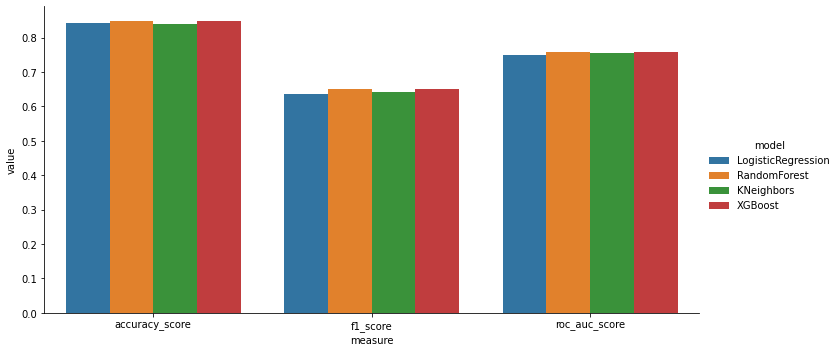

In [ ]:
test_results_df = pd.melt(test_results_df, id_vars="model", var_name="measure", value_name="value")
sns.catplot(x='measure', y='value', hue='model', data=test_results_df, kind='bar', aspect=2)
plt.show()

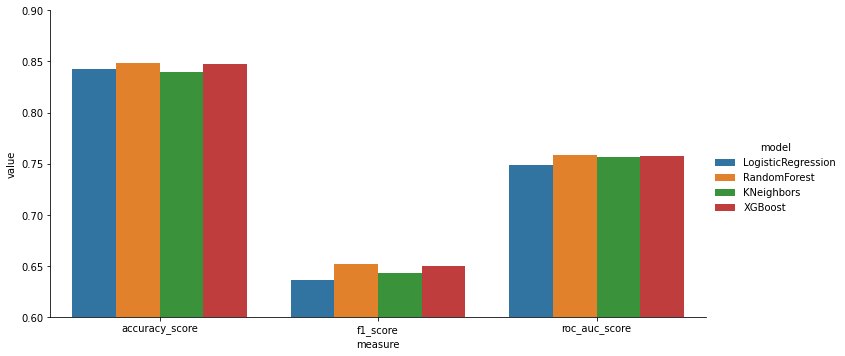

In [ ]:
sns.catplot(x='measure', y='value', hue='model', data=test_results_df, kind='bar', aspect=2)
plt.ylim(0.60, 0.9)
plt.show()